# Linear Classifiers and Tree-Based Models in Python

<img src="https://www.researchgate.net/profile/Klaus-Robert-Mueller/publication/221095188/figure/fig4/AS:668343308648455@1536356870403/Linear-classifier-and-margins-A-linear-classifier-is-defined-by-a-hyperplanes-normal.png" height=400 width=400 style="display: inline-block;">
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/04/dt.png" height=400 width=400 style="display: inline-block;">

Linear classifiers and tree-based models are both classification models and supervised machine learning techniques. They are used to make a decision to categories a set of data points to a discrete class based on a linear combination of its explanatory variables. We will see together 

## Linear Classifiers

### Logistic regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probaility that an instance belongs to a particular class (e.g., what is the proability that this email is spam ?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled "1"), or else it predicts that it does not (i.e., it belongs to the negative class, laeled "0"). This makes it a binary classifier.

#### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.
The logistic is a simoid function that outputs a number between 0 and 1. It is defined as :
$$ h_ \theta (t) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-t} }  $$ 

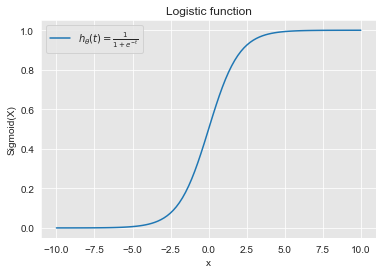

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# apply the default seaborn theme
#sns.set_theme()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
ax = plt.gca()   
ax.plot(x, z, label=r"$ h_ \theta (t) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-t} }  $")
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.title("Logistic function")
plt.legend()

plt.show()

Once the Logistic Regression model has estimated the probability that an instance x belongs to the positive class, it can make its prediction easily.

#### Decision Boundaries

We will need a dataset to illustrate Logistic Regression. Let's use the iris dataset which is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.<br>
Let's try to build a classifier to detect the Iris-Virginica based on the petal width and length features.

In [142]:
# Load the data
from sklearn import datasets
iris = datasets.load_iris()
print([*iris.keys()])

X = iris['data'][:, (2, 3)] # petal length and width
y = (iris['target']==2).astype(int) # 1 if Iris-Virginico, else 0



print(X.shape)
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
(150, 2)
(150,)


Now Let's train a Logistic Regression model:

In [143]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

Let's look at the model's estimated proabilities for flowers with petal widths varying from 0 to 3 cm and petal lenghts varying from 0 to 7 cm.

[[9.99999976e-01 2.41025811e-08]
 [9.99999975e-01 2.48617087e-08]
 [9.99999974e-01 2.56447455e-08]
 ...
 [9.23659738e-09 9.99999991e-01]
 [8.86248375e-09 9.99999991e-01]
 [8.50352289e-09 9.99999991e-01]]


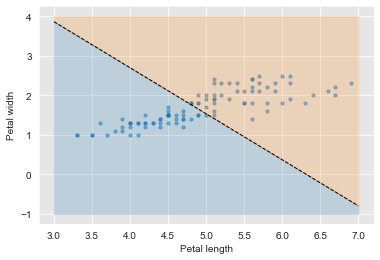

In [144]:
X_new_width = np.linspace(0, 3, 1000)
X_new_length = np.linspace(3, 7, 1000)
X_new = np.concatenate((X_new_width, X_new_length)).reshape(-1, 2)

y_proba = lr.predict_proba(X_new)
print(y_proba)

plt.scatter(X[X[:,0]>3][:, 0], X[X[:,0]>3][:, 1],  s=10, alpha=0.5)

# Retrieve the model parameters.
b = lr.intercept_[0]
w1, w2 = lr.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

xd = np.array([3, 7])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, -1, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, 4, color='tab:orange', alpha=0.2)

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

### Support Vector Machines

The main idea behind SVM is finding a frontier which separates observations into classes.
For this purpose, Let's consider the previous example.
Like Logistic regression, our SVM algorithm is asked to find a boundary which is able to segregate the two classes.
The two classes could be separated in various ways.
The best hyperplane is not only who separates the two classes ut also who stays as far away from the closest training instances as possible.

In [145]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC# LinearSVC

iris = datasets.load_iris()

X = iris['data'][:, 2:] # petal length, petal width
y = (iris['target'] == 0).astype(np.float64) 

svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_svc', SVC(kernel='linear', C=1))# LinearSVC(C=1, loss='hinge'))
    ])
svm_clf.fit(X, y)

svm_clf.predict([[2.5, 1.7]])

# Get number of support vectors per class
support_vectors_per_class = svm_clf['linear_svc'].n_support_
print(support_vectors_per_class)

[2 3]


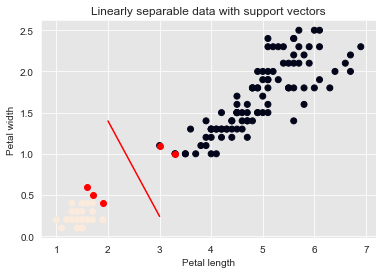

In [146]:
# Get support vectors indexes
support_vectors_index = svm_clf['linear_svc'].support_

# Visualize support vectors
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X[:,0][support_vectors_index], X[:,1][support_vectors_index], color='red')

# Plot the decision boundary
w = svm_clf['linear_svc'].coef_[0]
b = svm_clf['linear_svc'].intercept_[0]+6
xd = np.linspace(2, 3) # generating x-points from 0 to 7
yd = -(w[0] / w[1]) * xd - b / w[1] # getting corresponding y-points
plt.plot(xd, yd, c='r')

plt.title('Linearly separable data with support vectors')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

## Decision Trees

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.

In [147]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
print("Model accuracy: {}".format((tree_clf.predict(X) == y).sum() / len(y)))

Model accuracy: 0.96


### Visualizing

#### Text Representation

In [148]:
from sklearn import tree

text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_1 <= 0.80
|   |--- class: 0
|--- feature_1 >  0.80
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



Here is a better representation to understand how the decision tree works.

#### Visualize Decision Tree

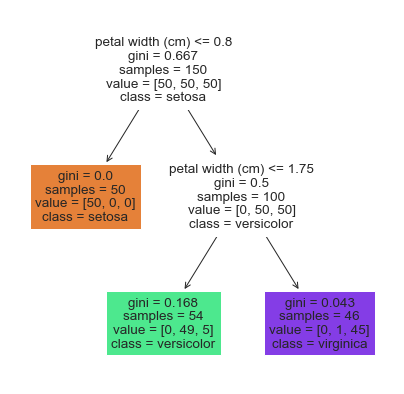

In [149]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names[2:],  
                   class_names=iris.target_names,
                   filled=True)

As seen in the previous figure, the tree makes predictions as follows.
When we want to classify an iris flower knowing its petal length and petal width, we start at the root node. This node asks whether the flower's petal length is smaller than 2.45 cm. If it is, then we move down to the root's left child node. In this case, it is a leaf node, so it does not ask any questions; we can simply look at the predicted class for that node and the Decision Tree predicts that our flower is an Iris-Setosa.
We suppose now that our flower has a petal length greater than 2.45 cm. We must move down to the root's right child node, which is not a leaf node, so it asks another question, is the petal width smaller than 1.75 cm ? If it is, then our flower is most likely an Iris-Versicolor. If not, it is likely an Iris-Virginica. It's really that simple.

References: Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow  O'REILLY